# Dataset 1: Walmart Dataset Preprocessing and EDA

## Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy.stats.mstats import winsorize

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
# Load the Walmart Dataset from Kaggle
df = pd.read_csv('Walmart.csv')

In [3]:
# Diplay the dataset
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1  05-02-2010    1643690.90             0        42.31       2.572  211.096358         8.106
1         1  12-02-2010    1641957.44             1        38.51       2.548  211.242170         8.106
2         1  19-02-2010    1611968.17             0        39.93       2.514  211.289143         8.106
3         1  26-02-2010    1409727.59             0        46.63       2.561  211.319643         8.106
4         1  05-03-2010    1554806.68             0        46.50       2.625  211.350143         8.106
...     ...         ...           ...           ...          ...         ...         ...           ...
6430     45  28-09-2012     713173.95             0        64.88       3.997  192.013558         8.684
6431     45  05-10-2012     733455.07             0        64.89       3.985  192.170412         8.667
6432     45  12-10-2012     734464.36             0        54.47       4.000  192.327265         8.667
6433     45  19-10-2012     718125.53             0        56.47       3.969  192.330854         8.667
6434     45  26-10-2012     760281.43             0        58.85       3.882  192.308899         8.667

[6435 rows x 8 columns]

In [4]:
# First 5 rows of dataset
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0      1  05-02-2010    1643690.90             0        42.31       2.572  211.096358         8.106
1      1  12-02-2010    1641957.44             1        38.51       2.548  211.242170         8.106
2      1  19-02-2010    1611968.17             0        39.93       2.514  211.289143         8.106
3      1  26-02-2010    1409727.59             0        46.63       2.561  211.319643         8.106
4      1  05-03-2010    1554806.68             0        46.50       2.625  211.350143         8.106

In [5]:
# Last 5 rows of dataset
df.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
6430     45  28-09-2012     713173.95             0        64.88       3.997  192.013558         8.684
6431     45  05-10-2012     733455.07             0        64.89       3.985  192.170412         8.667
6432     45  12-10-2012     734464.36             0        54.47       4.000  192.327265         8.667
6433     45  19-10-2012     718125.53             0        56.47       3.969  192.330854         8.667
6434     45  26-10-2012     760281.43             0        58.85       3.882  192.308899         8.667

## Data Preprocessing and Data Cleaning

In [6]:
# Shape
df.shape

(6435, 8)

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# Display summary statistics for the dataset (all columns)
print("Summary Statistics of the dataset: ")
df.describe(include='all')

Summary Statistics of the dataset: 


Store        Date  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price          CPI  Unemployment
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000  6435.000000  6435.000000   6435.000000
unique          NaN         143           NaN           NaN          NaN          NaN          NaN           NaN
top             NaN  05-02-2010           NaN           NaN          NaN          NaN          NaN           NaN
freq            NaN          45           NaN           NaN          NaN          NaN          NaN           NaN
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782     3.358607   171.578394      7.999151
std       12.988182         NaN  5.643666e+05      0.255049    18.444933     0.459020    39.356712      1.875885
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000     2.472000   126.064000      3.879000
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000     2.933000   131.735000      6.891000
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000     3.445000   182.616521      7.874000
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000     3.735000   212.743293      8.622000
max       45.000000         NaN  3.818686e+06      1.000000   100.140000     4.468000   227.232807     14.313000

In [9]:
# Check for duplicates and missing values
print(f"Duplicate rows found: {df.duplicated().sum()}\n")
print("Missing values per column:")
print(df.isnull().sum())

Duplicate rows found: 0

Missing values per column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [10]:
# Converting date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Convert 'Store' and 'Holiday_Flag' to categorical
df['Store'] = df['Store'].astype('category')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

In [11]:
# Temporal Features
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype('int64')
df['Day'] = df['Date'].dt.day                   

In [12]:
# Data types of each column
df.dtypes

Store                 category
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag          category
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Quarter                  int32
Month                    int32
Week                     int64
Day                      int32
dtype: object

In [13]:
# Display the dataset
df

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  Year  Quarter  Month  Week  Day
0        1 2010-02-05    1643690.90            0        42.31       2.572  211.096358         8.106  2010        1      2     5    5
1        1 2010-02-12    1641957.44            1        38.51       2.548  211.242170         8.106  2010        1      2     6   12
2        1 2010-02-19    1611968.17            0        39.93       2.514  211.289143         8.106  2010        1      2     7   19
3        1 2010-02-26    1409727.59            0        46.63       2.561  211.319643         8.106  2010        1      2     8   26
4        1 2010-03-05    1554806.68            0        46.50       2.625  211.350143         8.106  2010        1      3     9    5
...    ...        ...           ...          ...          ...         ...         ...           ...   ...      ...    ...   ...  ...
6430    45 2012-09-28     713173.95            0        64.88       3.997  192.013558         8.684  2012        3      9    39   28
6431    45 2012-10-05     733455.07            0        64.89       3.985  192.170412         8.667  2012        4     10    40    5
6432    45 2012-10-12     734464.36            0        54.47       4.000  192.327265         8.667  2012        4     10    41   12
6433    45 2012-10-19     718125.53            0        56.47       3.969  192.330854         8.667  2012        4     10    42   19
6434    45 2012-10-26     760281.43            0        58.85       3.882  192.308899         8.667  2012        4     10    43   26

[6435 rows x 13 columns]

## Feature Engineering

In [14]:
# Sort data by Store and Date for accurate time-series feature creation
df.sort_values(by=['Store', 'Date'], inplace=True)

# 1. Critical Lag Features
# Lag 52: Sales from the same week last year (Primary Seasonal Predictor)
df['Lag_52_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(52)
# Lag 1: Sales from the previous week (Primary Trend Predictor)
df['Lag_1_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)

# Handle NaNs from the shift operation (first 52 weeks of data for each store)
# Filling with the mean prevents data loss and maintains scale
df['Lag_52_Sales'].fillna(df['Lag_52_Sales'].mean(), inplace=True)
df['Lag_1_Sales'].fillna(df['Lag_1_Sales'].mean(), inplace=True)

In [15]:
# 2. Rolling Features 
# Rolling Mean (captures short-term trend direction)
df['Rolling_Mean_3W'] = df.groupby('Store')['Weekly_Sales'].transform(
    lambda x: x.shift(1).rolling(window=3).mean()
)

# Rolling Standard Deviation (captures short-term volatility/risk)
df['Rolling_Std_3W'] = df.groupby('Store')['Weekly_Sales'].transform(
    lambda x: x.shift(1).rolling(window=3).std()
)

# Handle NaNs from the rolling operation
df['Rolling_Mean_3W'].fillna(df['Rolling_Mean_3W'].mean(), inplace=True)
df['Rolling_Std_3W'].fillna(df['Rolling_Std_3W'].mean(), inplace=True)

In [16]:
# 3. Temporal Features 
def get_season(month):
    '''this function is to get season according to month column'''
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['Season'] = df['Month'].apply(get_season)

In [17]:
# Display the dataset
df

Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  Year  Quarter  Month  Week  Day  Lag_52_Sales   Lag_1_Sales  Rolling_Mean_3W  Rolling_Std_3W  Season
0        1 2010-02-05    1643690.90            0        42.31       2.572  211.096358         8.106  2010        1      2     5    5  1.035127e+06  1.047210e+06     1.047133e+06    71789.192853  Winter
1        1 2010-02-12    1641957.44            1        38.51       2.548  211.242170         8.106  2010        1      2     6   12  1.035127e+06  1.643691e+06     1.047133e+06    71789.192853  Winter
2        1 2010-02-19    1611968.17            0        39.93       2.514  211.289143         8.106  2010        1      2     7   19  1.035127e+06  1.641957e+06     1.047133e+06    71789.192853  Winter
3        1 2010-02-26    1409727.59            0        46.63       2.561  211.319643         8.106  2010        1      2     8   26  1.035127e+06  1.611968e+06     1.632539e+06    17835.791719  Winter
4        1 2010-03-05    1554806.68            0        46.50       2.625  211.350143         8.106  2010        1      3     9    5  1.035127e+06  1.409728e+06     1.554551e+06   126313.968444  Spring
...    ...        ...           ...          ...          ...         ...         ...           ...   ...      ...    ...   ...  ...           ...           ...              ...             ...     ...
6430    45 2012-09-28     713173.95            0        64.88       3.997  192.013558         8.684  2012        3      9    39   28  6.989863e+05  7.230862e+05     7.306124e+05    32791.489809  Autumn
6431    45 2012-10-05     733455.07            0        64.89       3.985  192.170412         8.667  2012        4     10    40    5  7.534471e+05  7.131739e+05     7.128328e+05    10428.150862  Autumn
6432    45 2012-10-12     734464.36            0        54.47       4.000  192.327265         8.667  2012        4     10    41   12  7.209470e+05  7.334551e+05     7.232384e+05    10141.416679  Autumn
6433    45 2012-10-19     718125.53            0        56.47       3.969  192.330854         8.667  2012        4     10    42   19  7.716864e+05  7.344644e+05     7.270311e+05    12011.272849  Autumn
6434    45 2012-10-26     760281.43            0        58.85       3.882  192.308899         8.667  2012        4     10    43   26  7.816946e+05  7.181255e+05     7.286817e+05     9155.788958  Autumn

[6435 rows x 18 columns]

In [18]:
# Shape
df.shape

(6435, 18)

In [19]:
# Data types of each column
df.dtypes

Store                    category
Date               datetime64[ns]
Weekly_Sales              float64
Holiday_Flag             category
Temperature               float64
Fuel_Price                float64
CPI                       float64
Unemployment              float64
Year                        int32
Quarter                     int32
Month                       int32
Week                        int64
Day                         int32
Lag_52_Sales              float64
Lag_1_Sales               float64
Rolling_Mean_3W           float64
Rolling_Std_3W            float64
Season                     object
dtype: object

## Data Visualisation / Exploratory Data Analysis (EDA)

### 1. Target Variable Analysis (Weekly_Sales)
#### Purpose: Check for skewness and identify extreme high-sales transactions (outliers).

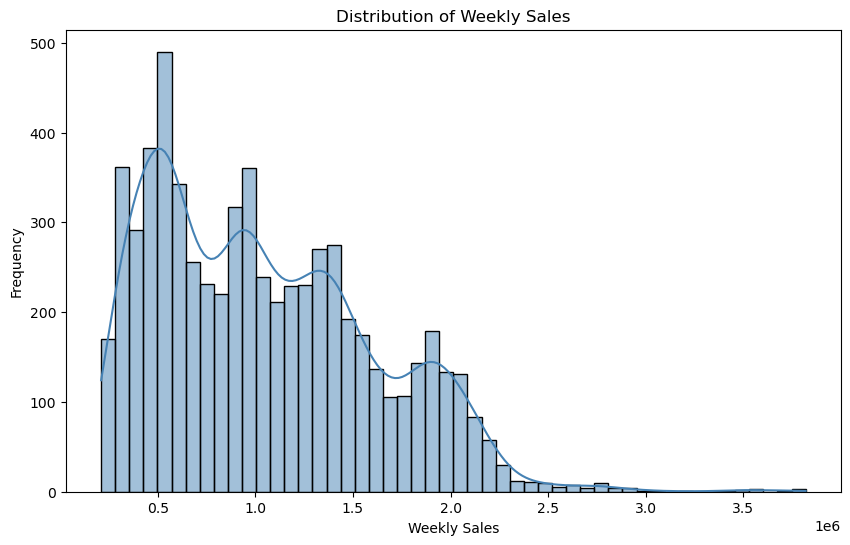

In [20]:
# Histogram + KDE
# Purpose: Check skewness, distribution shape and sales variability.
plt.figure(figsize=(10,6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color='steelblue')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

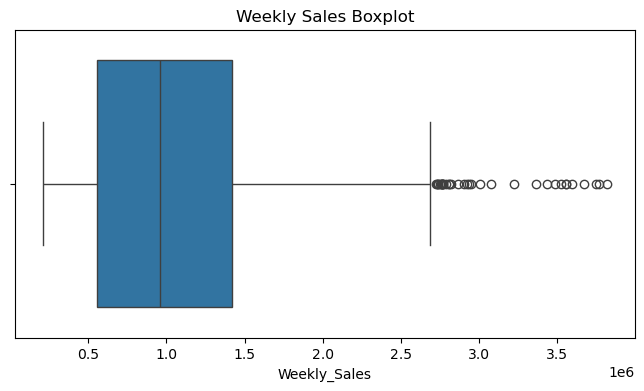

In [21]:
# Boxplot (for Outliers)
# Purpose: Identify extreme high-sales weeks (e.g., holiday effects).
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Weekly Sales Boxplot")
plt.show()

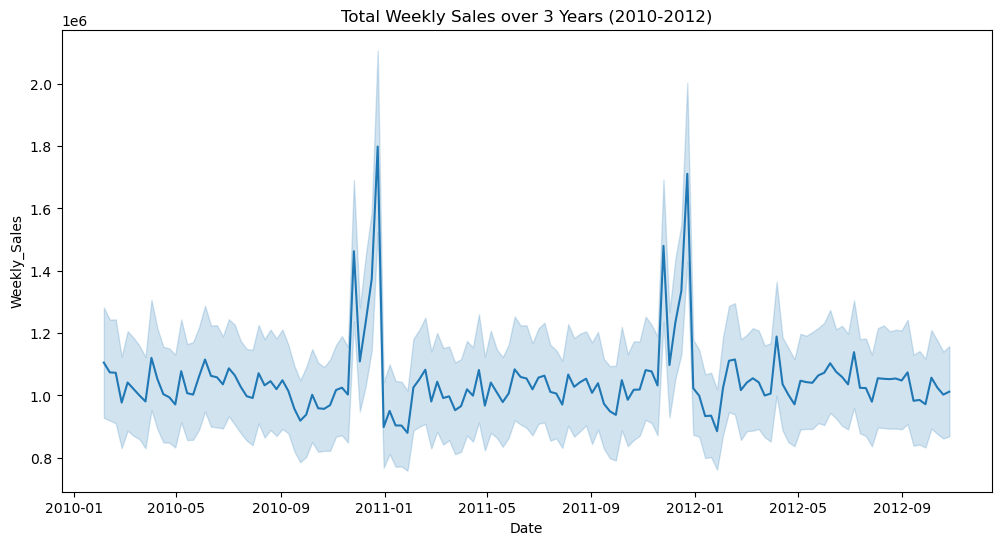

In [22]:
# Sales over time
# Purpose: Observe seasonality, long-term trends and peaks.
plt.figure(figsize=(12,6))
sns.lineplot(x=df["Date"],y=df['Weekly_Sales']);
plt.title("Total Weekly Sales over 3 Years (2010-2012)");

### 2. Temporal Feature Analysis
#### Understand how time-related variables affect sales.
#### Purpose: Reveal temporal patterns, seasonality and potential periodic fluctuations.

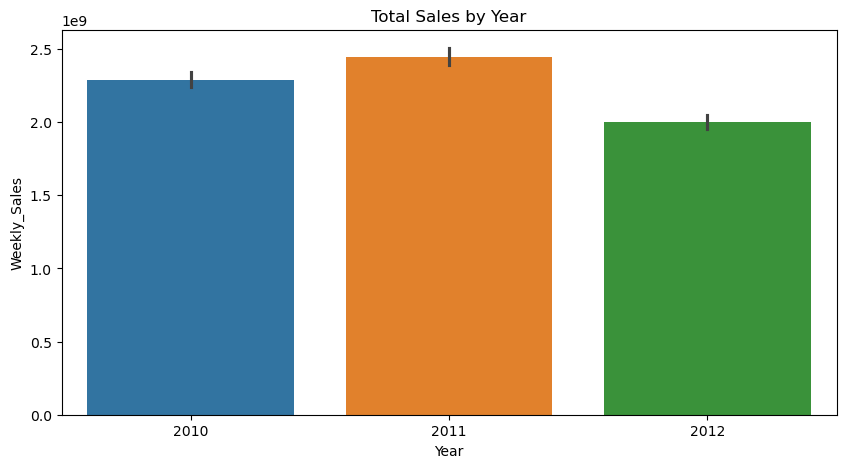

In [23]:
# Yearly Sales Trend
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Weekly_Sales', hue='Year', legend=False, palette='tab10', data=df, estimator=sum)
plt.title("Total Sales by Year")
plt.show()

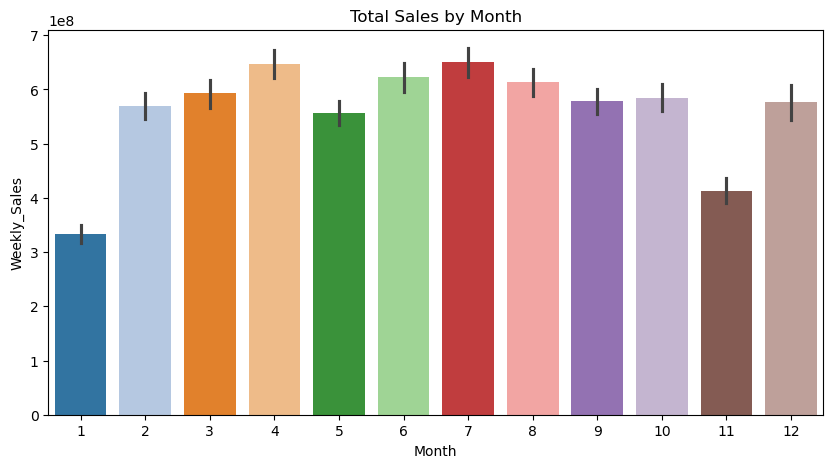

In [24]:
# Monthly Sales Trend
plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='Weekly_Sales', hue='Month', legend=False, palette='tab20', data=df, estimator=sum)
plt.title("Total Sales by Month")
plt.show()

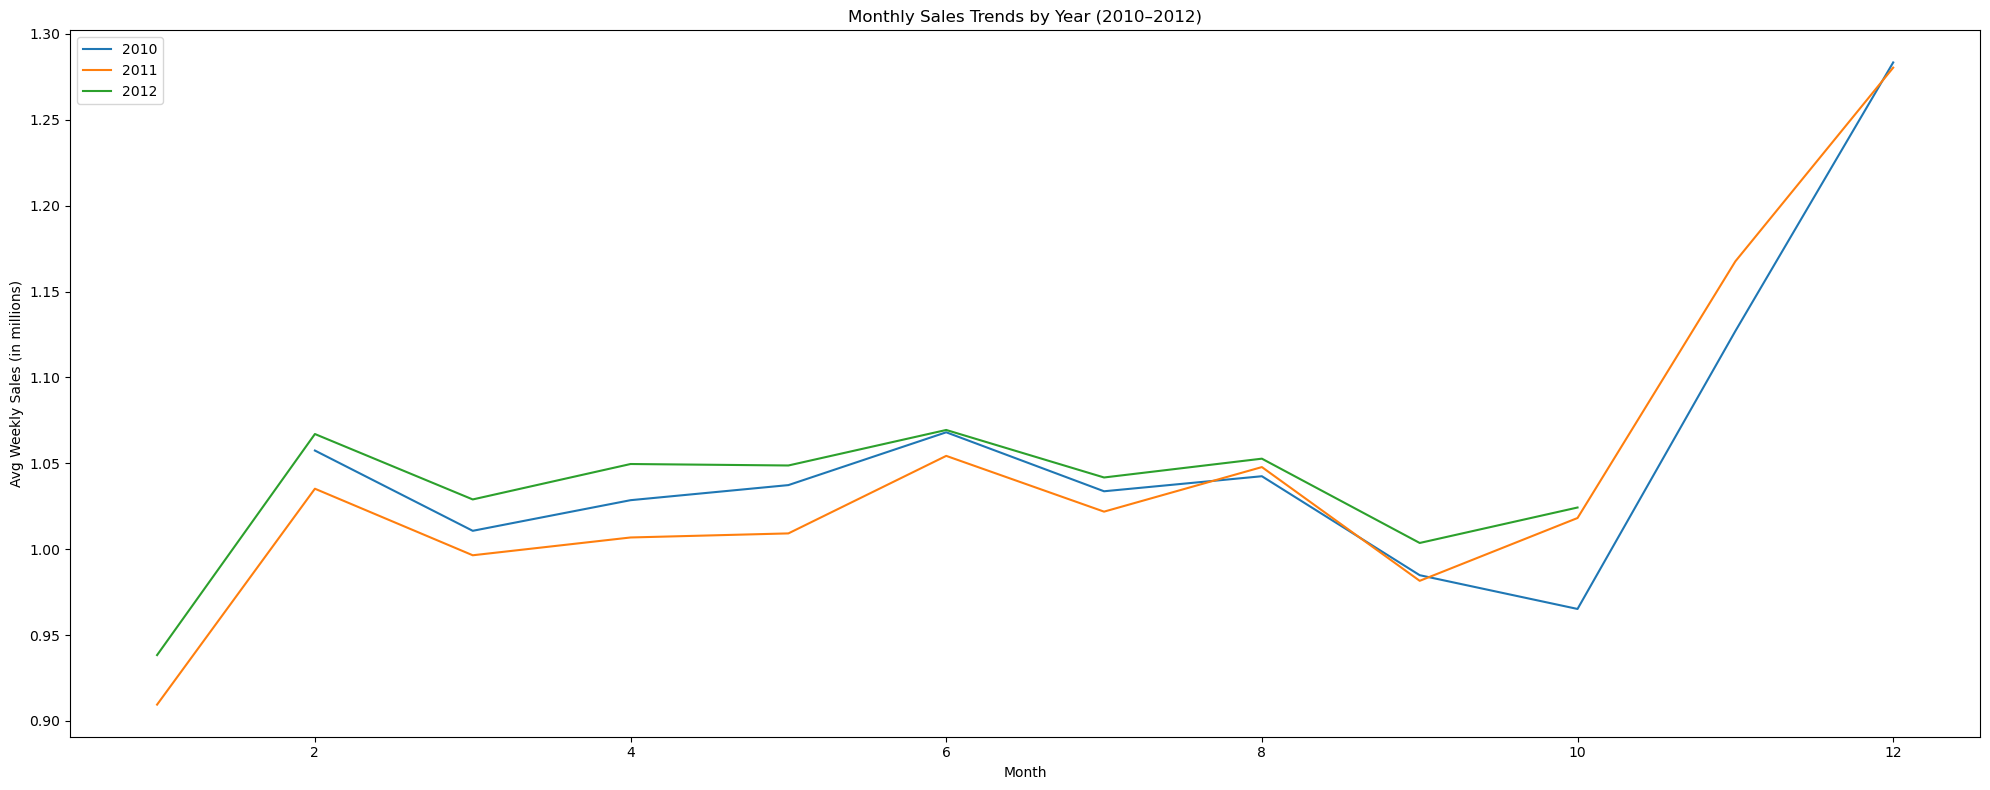

In [25]:
# Monthly Sales Trend (Line Plot)
pivot_table = df.pivot_table(index='Month', columns='Year', values='Weekly_Sales')

plt.figure(figsize=(20, 8))
for year in pivot_table.columns:
    sns.lineplot(x=pivot_table.index, y=pivot_table[year] / 1e6, label=str(year))

plt.title("Monthly Sales Trends by Year (2010–2012)")
plt.ylabel("Avg Weekly Sales (in millions)")
plt.xlabel("Month")
plt.legend()
plt.tight_layout()
plt.show()

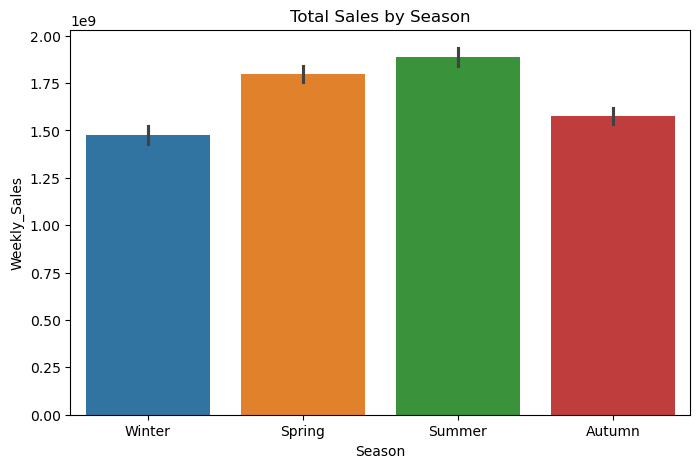

In [26]:
# Seasonal Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Season', y='Weekly_Sales', hue='Season', legend=False, palette='tab10', data=df, estimator=sum)
plt.title("Total Sales by Season")
plt.show()

### 3. Categorical Feature Analysis
#### Focuses on store-level and holiday effects.
#### Purpose: Identify which stores and holiday periods influence sales most.

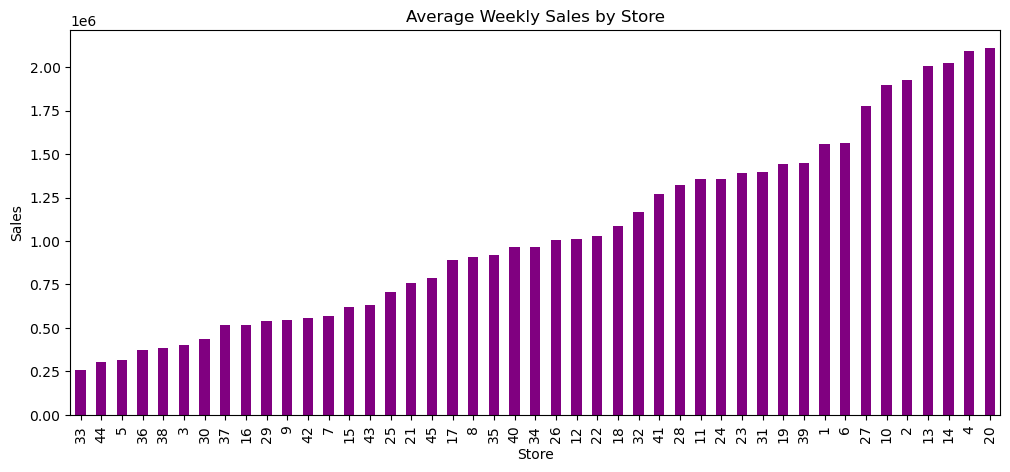

In [27]:
# Average Sales by Store
plt.figure(figsize=(12,5))
store_sales = df.groupby('Store', observed=True)['Weekly_Sales'].mean().sort_values(ascending=True)
plt.title("Average Weekly Sales by Store")
plt.ylabel("Sales")
store_sales.plot(kind='bar', color='purple')
plt.show()

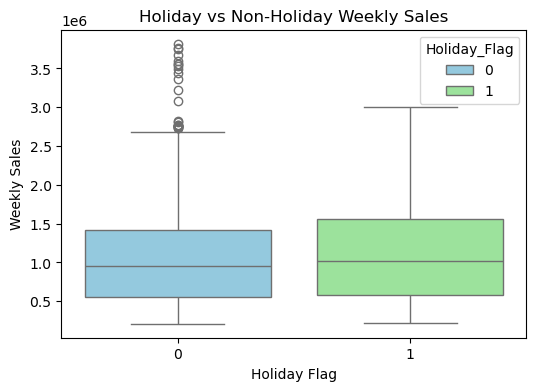

In [28]:
# Holiday vs Non-Holiday 
plt.figure(figsize=(6,4))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', hue='Holiday_Flag', data=df, 
            palette=['skyblue', 'lightgreen'])  # Define colors for each category
plt.title("Holiday vs Non-Holiday Weekly Sales")
plt.xlabel("Holiday Flag")
plt.ylabel("Weekly Sales")
plt.show()

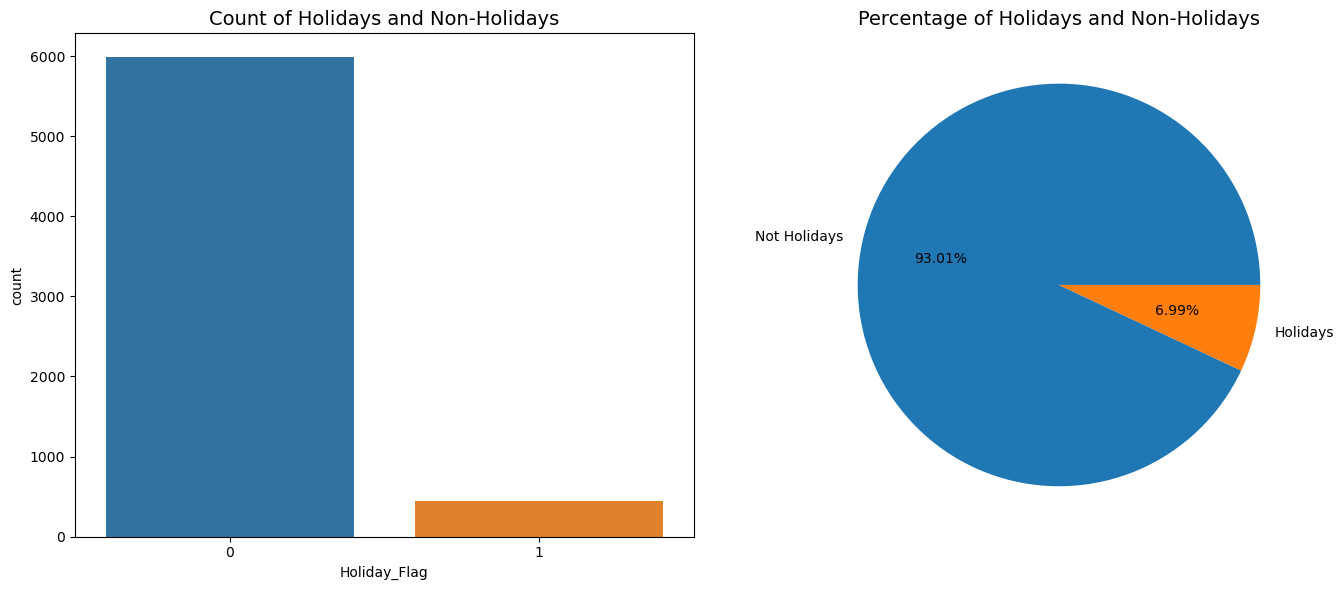

In [29]:
# Count and Percentage of Holidays and Non-Holidays
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data=df, x='Holiday_Flag', hue='Holiday_Flag', ax=ax[0], 
              palette=['#1f77b4', '#ff7f0e'], legend=False)
ax[0].set_title("Count of Holidays and Non-Holidays", fontsize=14)

ax[1].pie(df['Holiday_Flag'].value_counts().values,
          labels = ['Not Holidays', 'Holidays'],
          autopct = '%1.2f%%')
ax[1].set_title("Percentage of Holidays and Non-Holidays", fontsize=14)

plt.tight_layout()
plt.show()

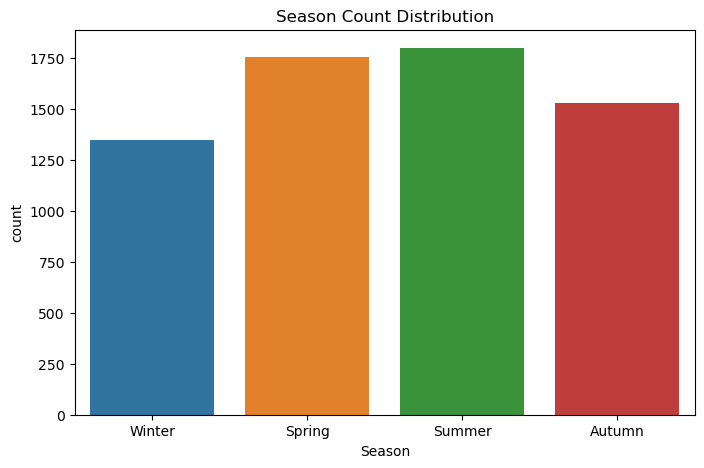

In [30]:
# Seasonal Count Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Season', hue='Season', legend=False, palette='tab10', data=df)
plt.title("Season Count Distribution")
plt.show()

### 4. Numerical Feature Analysis
#### Understand independent numeric variable distributions and relationships.
#### Purpose: Detect key predictors and potential multicollinearity among features.

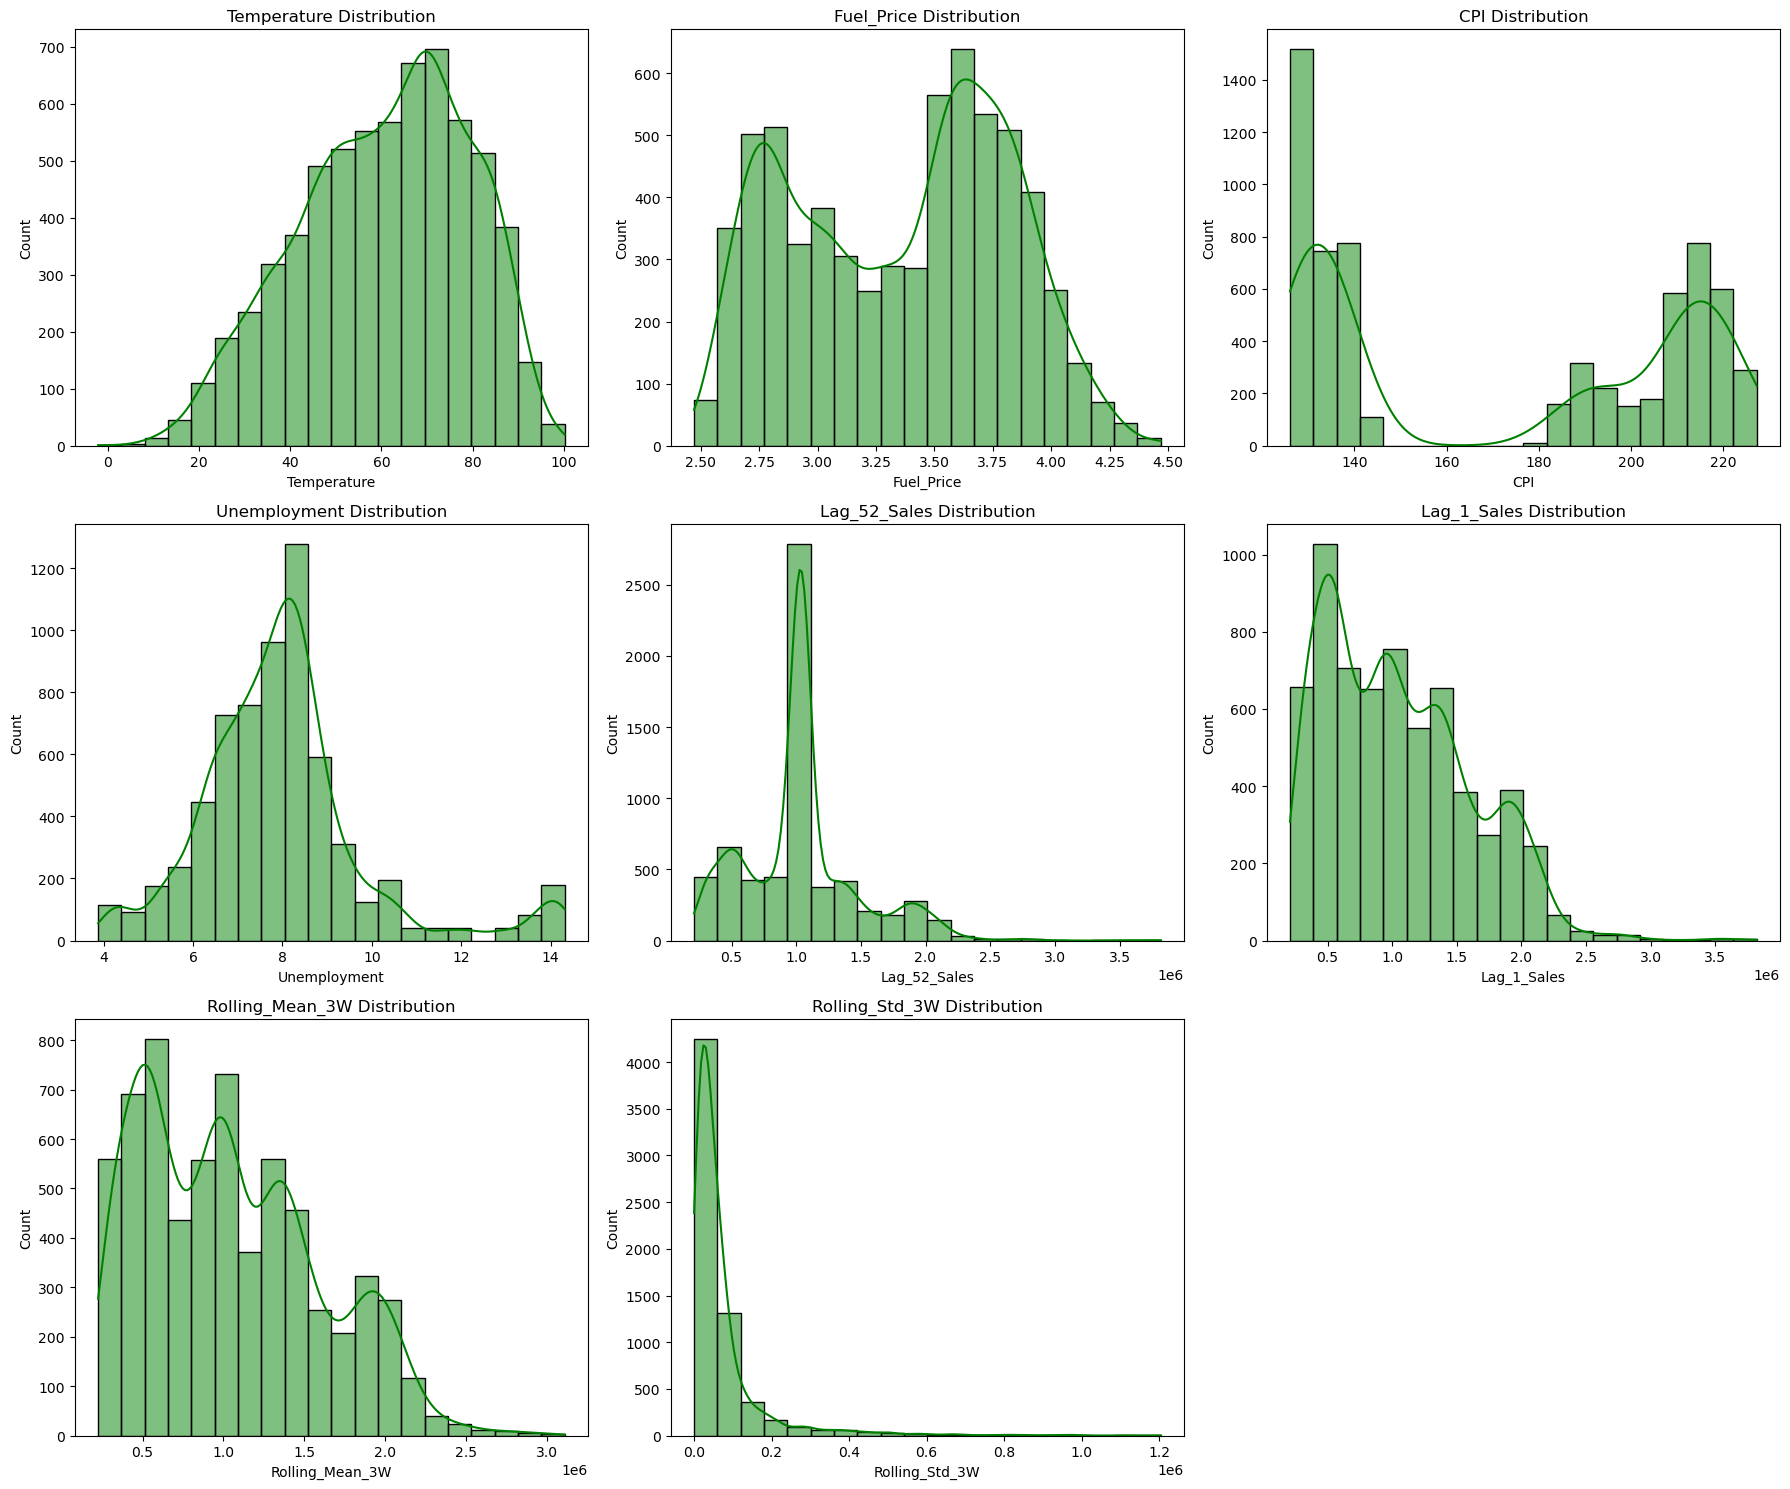

In [31]:
# Histograms (Univariate)
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lag_52_Sales', 'Lag_1_Sales',
                'Rolling_Mean_3W', 'Rolling_Std_3W']

plt.figure(figsize=(18,15))
for i, col in enumerate(num_features):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True, bins=20, color='green')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

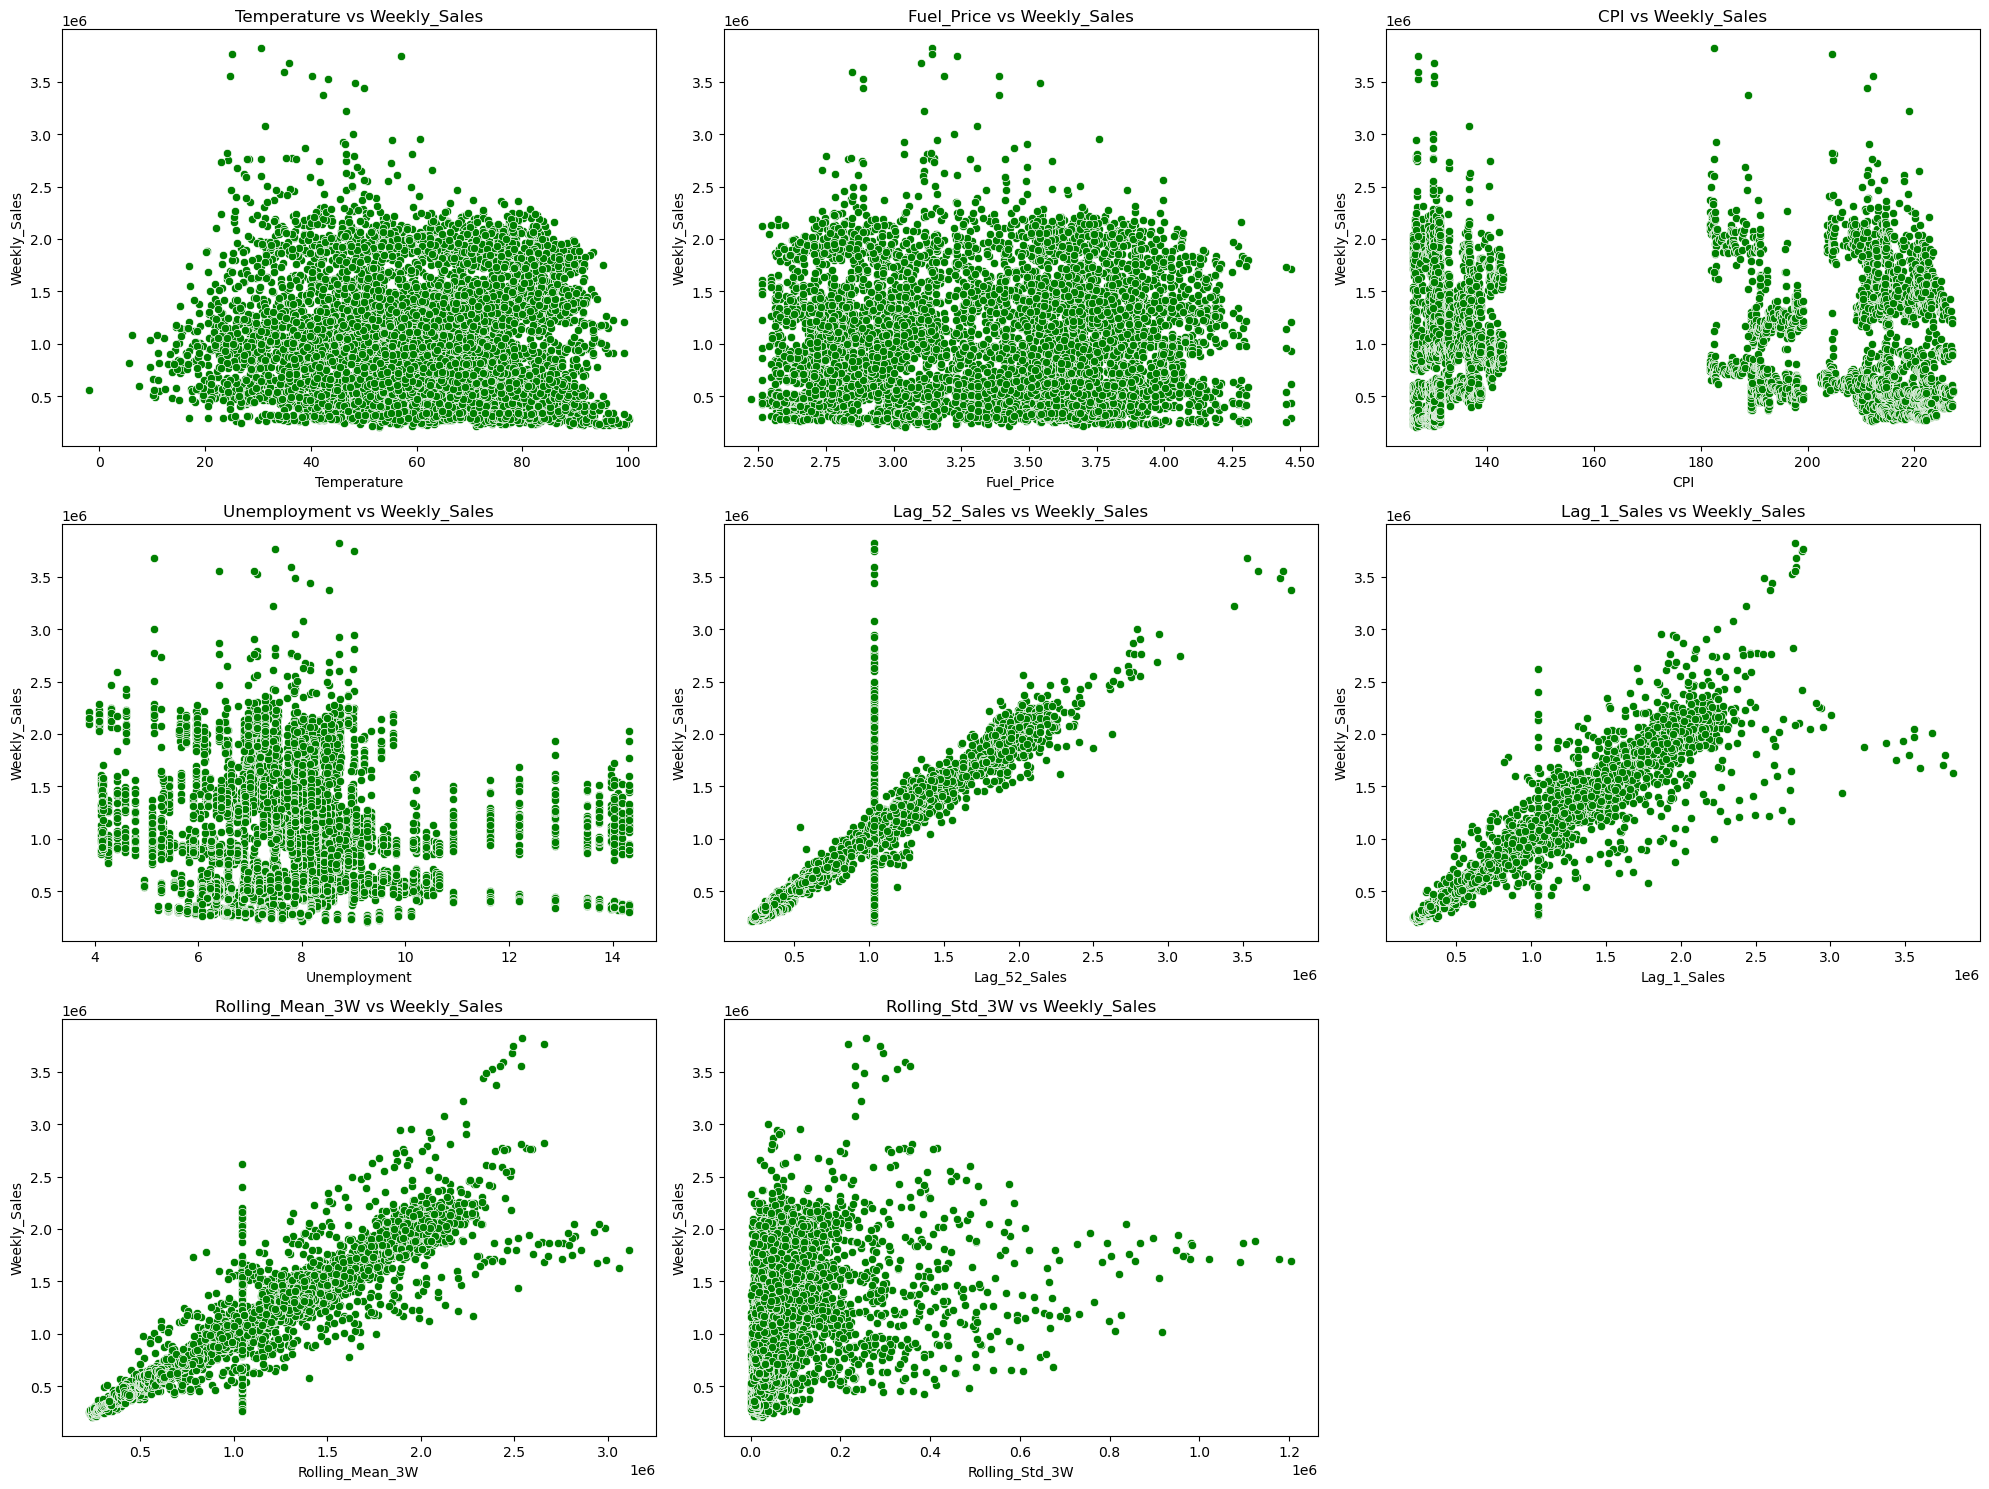

In [32]:
# Scatterplots vs Weekly_Sales (Bivariate)
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lag_52_Sales', 'Lag_1_Sales',
        'Rolling_Mean_3W', 'Rolling_Std_3W']

# Calculate how many rows we need (3 plots per row)
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # Ceiling division to ensure we have enough rows

# Create a subplot grid with the right dimensions
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
ax = ax.flatten()  # Flatten the 2D array to make indexing easier

# Create the scatterplots
for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='Weekly_Sales', ax=ax[i], color='green')
    ax[i].set_title(f'{col} vs Weekly_Sales')

# Hide any unused subplots
for j in range(len(cols), len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()

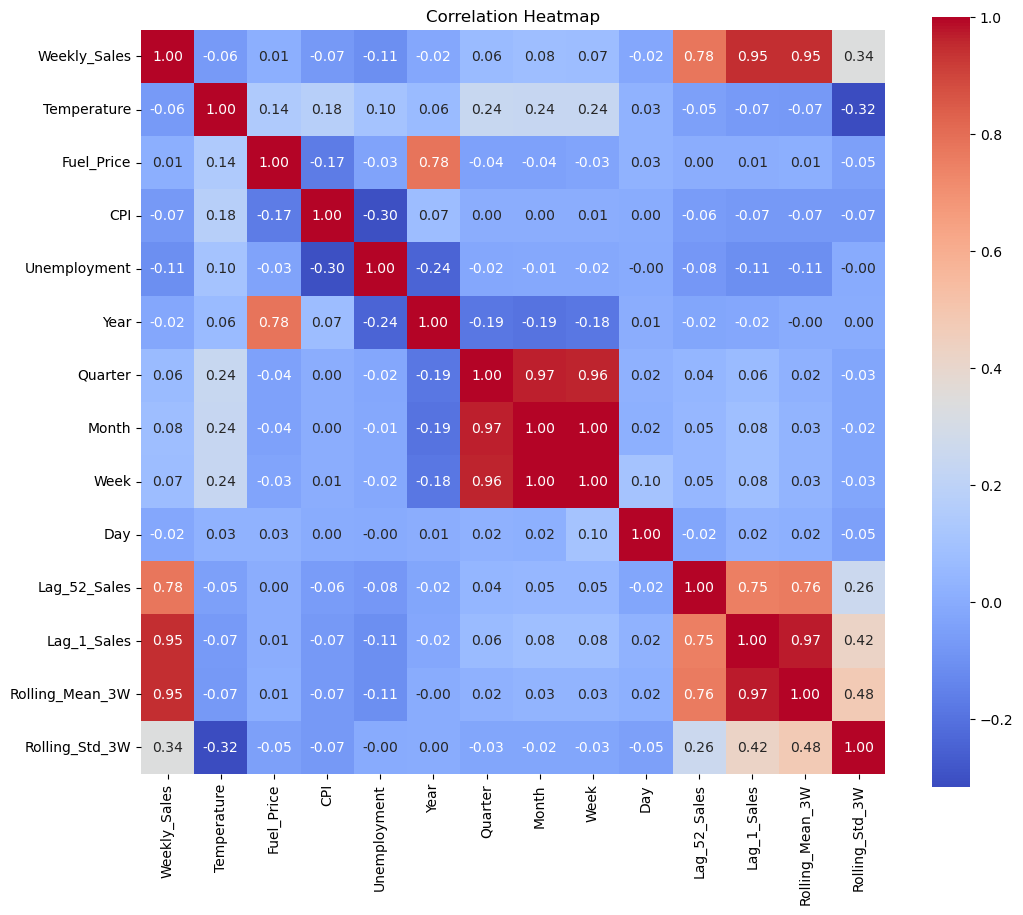

In [33]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

### 5. Pair Plot
#### Purpose: Visual overview of relationships among important variables.

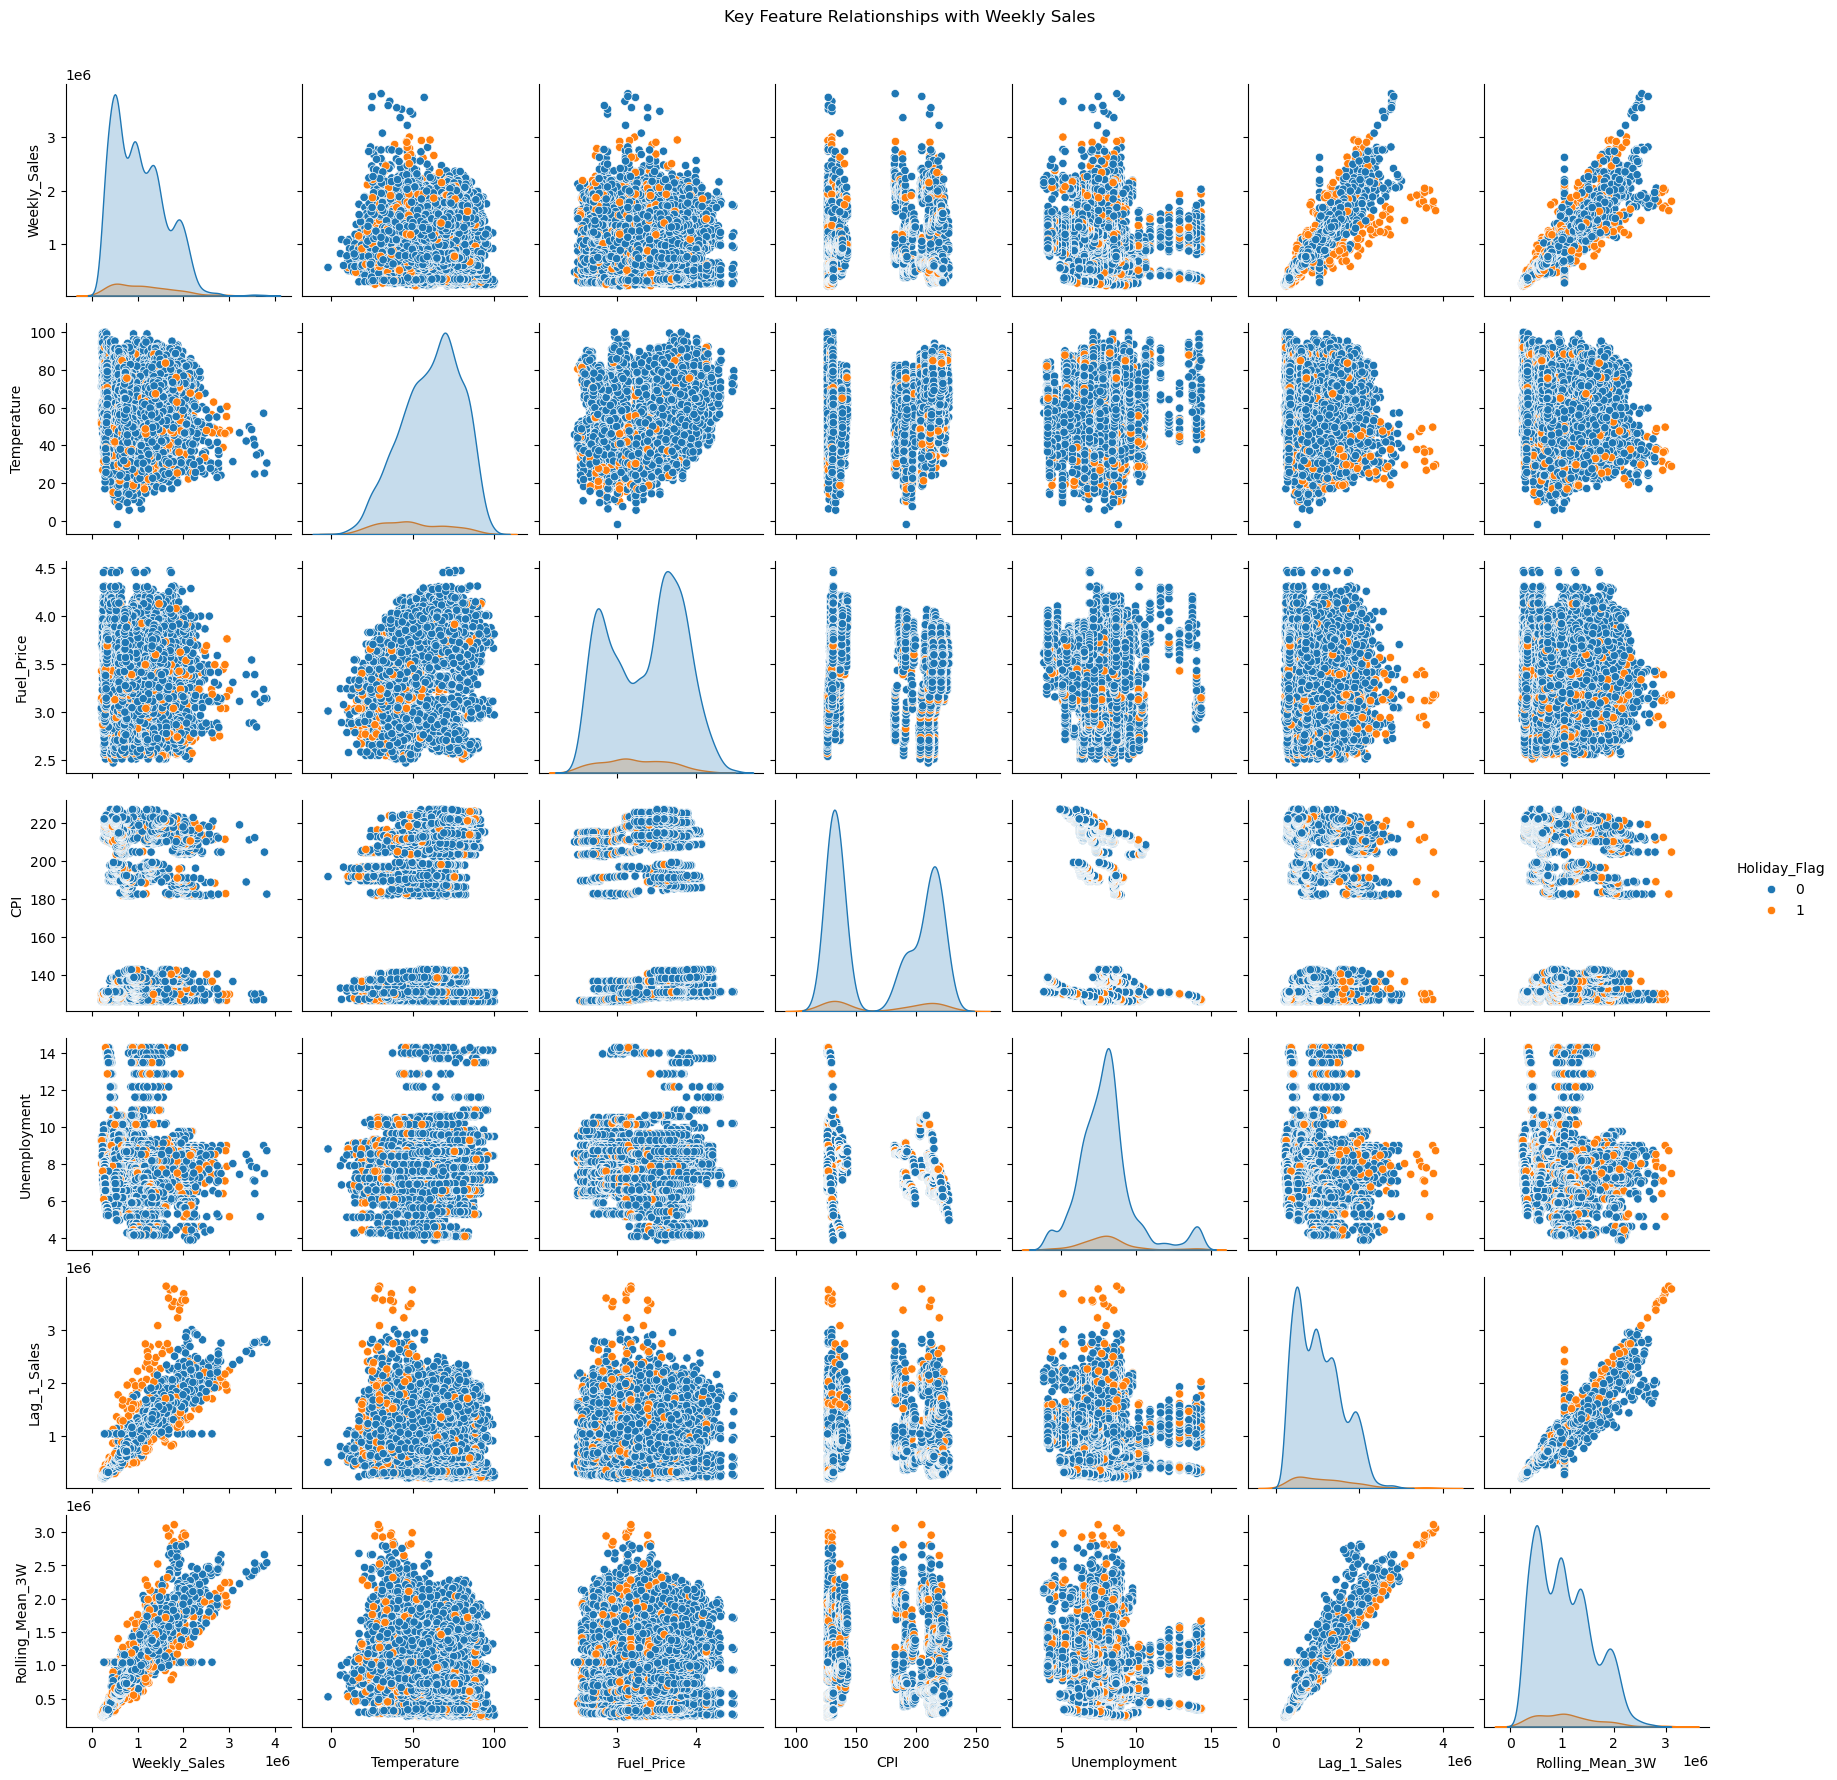

In [34]:
# Select features
pair_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lag_1_Sales',
                 'Rolling_Mean_3W']

# Create pairplot with Holiday_Flag as hue
g = sns.pairplot(df[pair_features + ['Holiday_Flag']], hue='Holiday_Flag', diag_kind='kde', corner=False)
g.fig.suptitle("Key Feature Relationships with Weekly Sales", y=1.02)
plt.show()

## Outlier Detection

COMPREHENSIVE OUTLIER ANALYSIS (IQR METHOD)


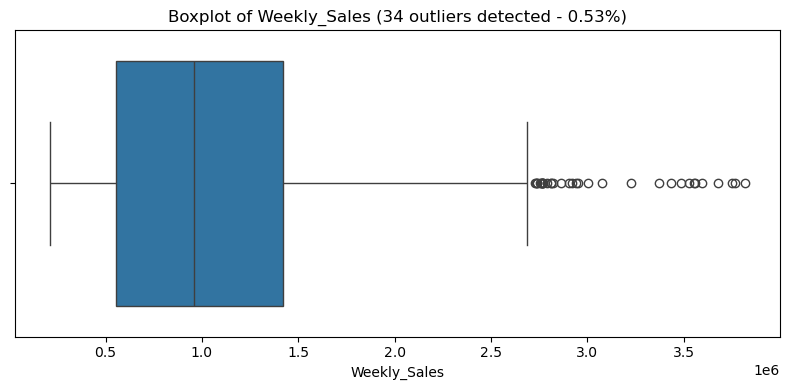


--- Weekly_Sales ---
Outliers Detected: 34 (0.53%)
IQR Bounds: [-746862.73, 2720371.49]
Data Range: [209986.25, 3818686.45]
--------------------------------------------------


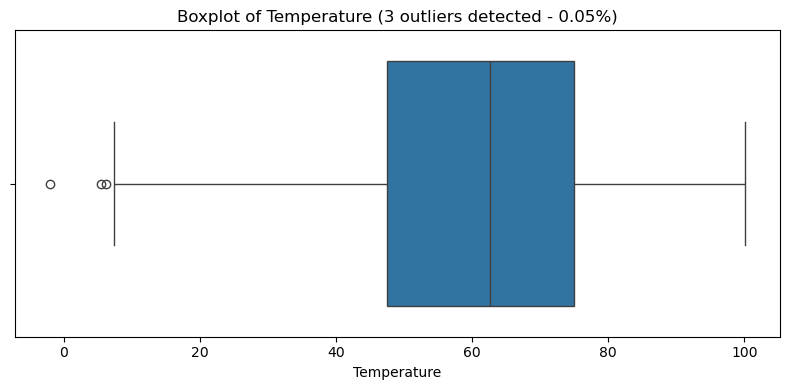


--- Temperature ---
Outliers Detected: 3 (0.05%)
IQR Bounds: [6.24, 116.16]
Data Range: [-2.06, 100.14]
--------------------------------------------------


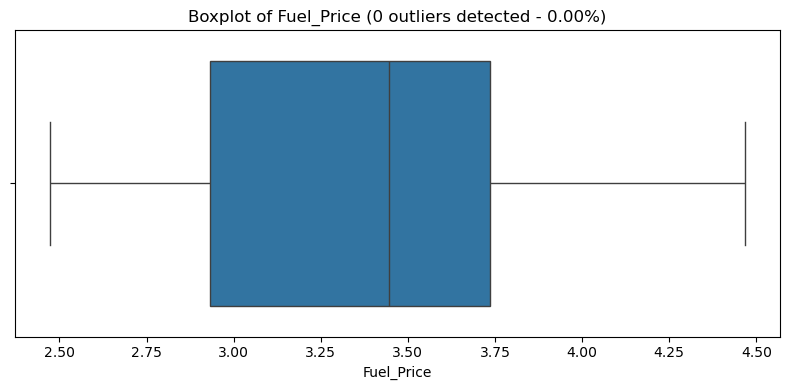


--- Fuel_Price ---
Outliers Detected: 0 (0.00%)
IQR Bounds: [1.73, 4.94]
Data Range: [2.47, 4.47]
--------------------------------------------------


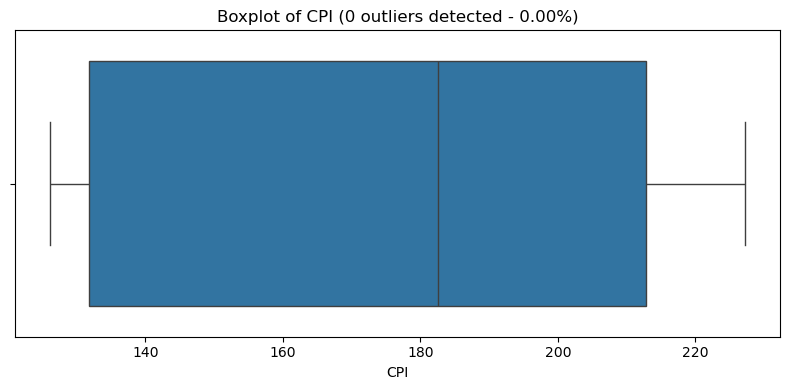


--- CPI ---
Outliers Detected: 0 (0.00%)
IQR Bounds: [10.22, 334.26]
Data Range: [126.06, 227.23]
--------------------------------------------------


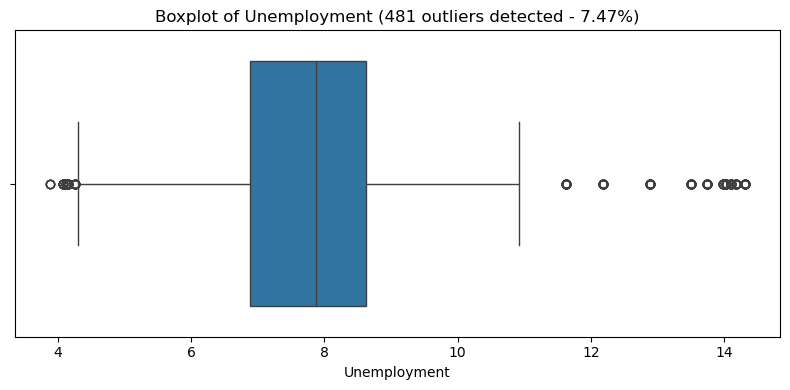


--- Unemployment ---
Outliers Detected: 481 (7.47%)
IQR Bounds: [4.29, 11.22]
Data Range: [3.88, 14.31]
--------------------------------------------------


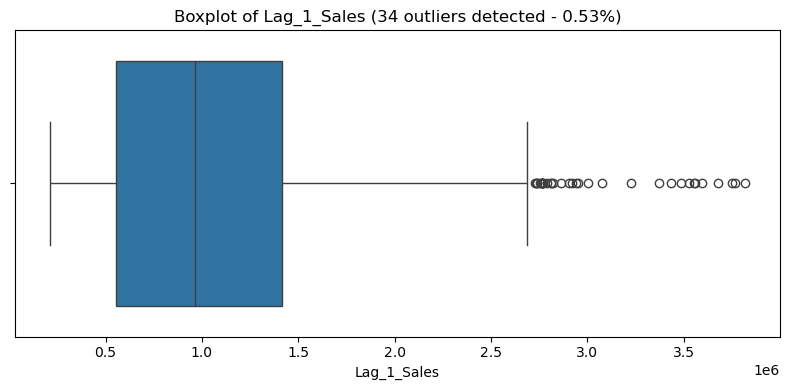


--- Lag_1_Sales ---
Outliers Detected: 34 (0.53%)
IQR Bounds: [-737985.37, 2710913.29]
Data Range: [209986.25, 3818686.45]
--------------------------------------------------


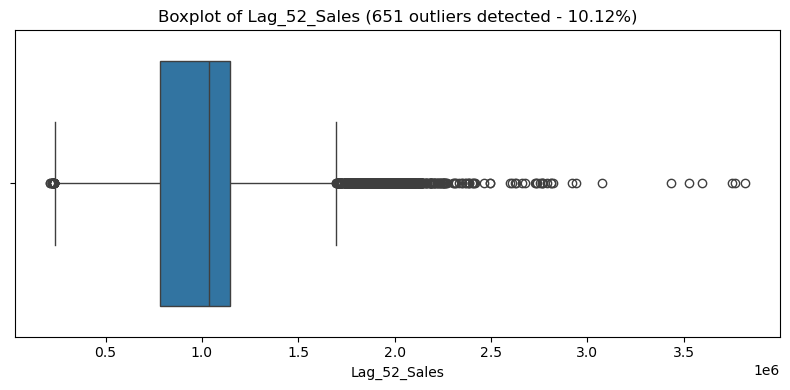


--- Lag_52_Sales ---
Outliers Detected: 651 (10.12%)
IQR Bounds: [237046.21, 1694142.91]
Data Range: [209986.25, 3818686.45]
--------------------------------------------------

SUMMARY STATISTICS FOR ALL TARGETED NUMERIC COLUMNS


Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment   Lag_1_Sales  Lag_52_Sales
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000  6.435000e+03  6.435000e+03
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151  1.047210e+06  1.035127e+06
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885  5.626803e+05  4.445489e+05
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000  2.099862e+05  2.099862e+05
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000  5.553516e+05  7.834575e+05
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000  9.660550e+05  1.035127e+06
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000  1.417576e+06  1.147732e+06
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000  3.818686e+06  3.818686e+06

In [35]:
# Define the columns for outlier analysis
numeric_list = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lag_1_Sales', 'Lag_52_Sales']

print("=" * 60)
print("COMPREHENSIVE OUTLIER ANALYSIS (IQR METHOD)")
print("=" * 60)

# Dictionary to store results for final summary
outlier_summary = {}

for col in numeric_list:
    # 1. Calculate IQR bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 2. Find and count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = outlier_count

    # 3. Visualization (Boxplot)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    
    title_text = f'Boxplot of {col} ({outlier_count} outliers detected - {outlier_percent:.2f}%)'
    plt.title(title_text)
    plt.tight_layout()
    plt.show()

    # 4. Print consolidated statistics
    print(f"\n--- {col} ---")
    print(f"Outliers Detected: {outlier_count} ({outlier_percent:.2f}%)")
    print(f"IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Data Range: [{df[col].min():.2f}, {df[col].max():.2f}]")

    print("-" * 50)

# Summary Statistics for all 5 columns targeted for outlier detection
print("\n" + "=" * 60)
print("SUMMARY STATISTICS FOR ALL TARGETED NUMERIC COLUMNS")
print("=" * 60)
display(df[numeric_list].describe())

## Winsorization to Handle Outliers

FINAL TARGETED WINSORIZATION & VERIFICATION
Winsorization limits adjusted (Unemployment: 1% lower, 10% upper) and applied.
Summary Statistics After Final Targeted Winsorization:


Weekly_Sales  Temperature  Unemployment   Lag_1_Sales  Lag_52_Sales
count  6.435000e+03  6435.000000   6435.000000  6.435000e+03  6.435000e+03
mean   1.042901e+06    60.680598      7.767135  1.043147e+06  1.031679e+06
std    5.509298e+05    18.291130      1.335445  5.492040e+05  4.307657e+05
min    2.530501e+05    18.510000      4.156000  2.530501e+05  2.670653e+05
25%    5.533501e+05    47.460000      6.891000  5.553516e+05  7.834575e+05
50%    9.607460e+05    62.670000      7.874000  9.660550e+05  1.035127e+06
75%    1.420159e+06    74.940000      8.622000  1.417576e+06  1.147732e+06
max    2.405395e+06    93.190000      9.863000  2.405395e+06  2.207742e+06


VERIFYING OUTLIER REMOVAL VIA BOXPLOTS:


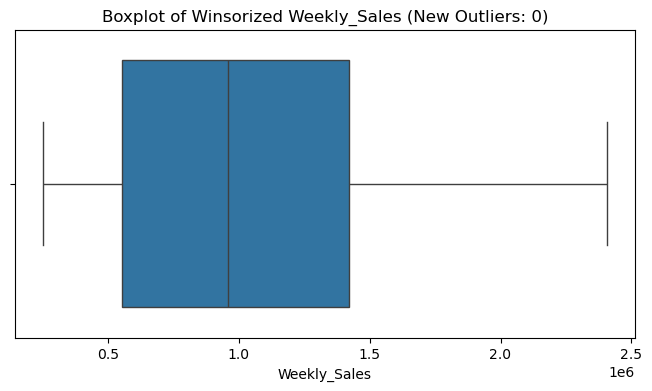

'Weekly_Sales' final range: [253050.10, 2405395.22]
New outliers detected by IQR: 0
------------------------------


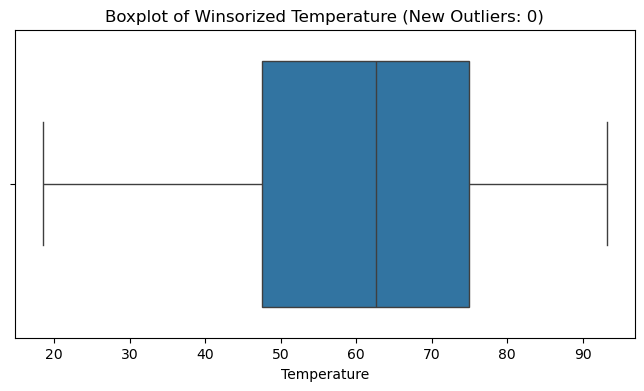

'Temperature' final range: [18.51, 93.19]
New outliers detected by IQR: 0
------------------------------


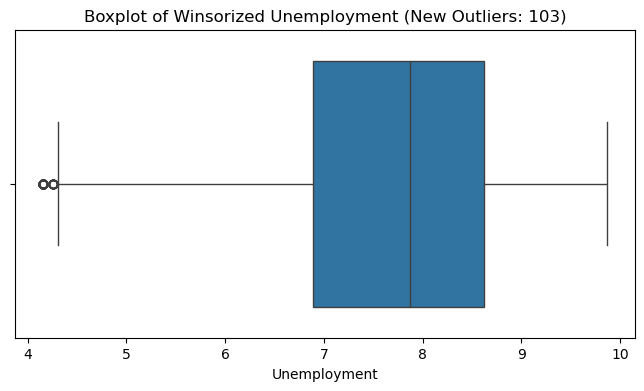

'Unemployment' final range: [4.16, 9.86]
New outliers detected by IQR: 103
------------------------------


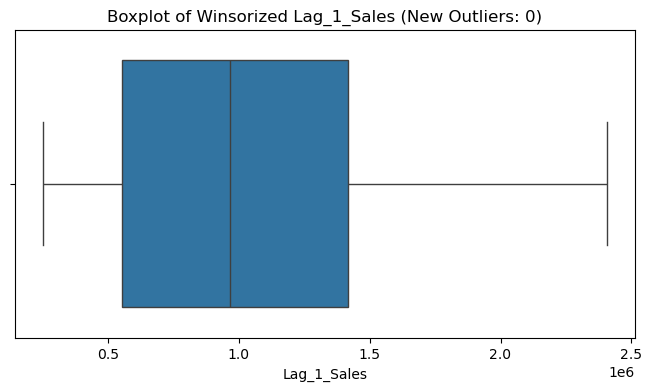

'Lag_1_Sales' final range: [253050.10, 2405395.22]
New outliers detected by IQR: 0
------------------------------


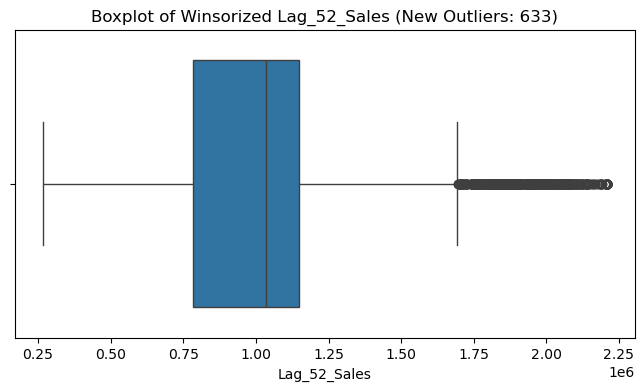

'Lag_52_Sales' final range: [267065.35, 2207742.13]
New outliers detected by IQR: 633
------------------------------


In [36]:
# Columns confirmed to require treatment
cols_to_winsorize = ['Weekly_Sales', 'Temperature', 'Unemployment', 'Lag_1_Sales', 'Lag_52_Sales']

print("=" * 60)
print("FINAL TARGETED WINSORIZATION & VERIFICATION")
print("=" * 60)

# Apply Final Targeted Winsorization 
# This block applies the final, most aggressive cap needed for each feature.
for col in cols_to_winsorize:
    if col == 'Unemployment':
        # Applying a 1% lower and 10% upper cap for the noisy Unemployment feature.
        df[col] = winsorize(df[col], limits=[0.01, 0.10])
    else:
        # Applying the standard 1% upper and 1% lower for other features.
        df[col] = winsorize(df[col], limits=[0.01, 0.01])

print("Winsorization limits adjusted (Unemployment: 1% lower, 10% upper) and applied.")

# Display summary statistics after the final adjustment
print("Summary Statistics After Final Targeted Winsorization:")
display(df[cols_to_winsorize].describe())

# Verification Check
print("\nVERIFYING OUTLIER REMOVAL VIA BOXPLOTS:")

# Suppress the NumPy UserWarnings for clean output during quantile calculation
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    
    for col in cols_to_winsorize:
        # Recalculate IQR bounds based on the final winsorized data
        Q1_final = df[col].quantile(0.25)
        Q3_final = df[col].quantile(0.75)
        IQR_final = Q3_final - Q1_final
        lower_bound_final = Q1_final - 1.5 * IQR_final
        upper_bound_final = Q3_final + 1.5 * IQR_final

        # Find outliers in the final winsorized data
        outlier_count_new = len(df[(df[col] < lower_bound_final) | (df[col] > upper_bound_final)])

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
         # Trigger image of final clean distribution

        plt.title(f'Boxplot of Winsorized {col} (New Outliers: {outlier_count_new})')
        plt.show()

        print(f"'{col}' final range: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"New outliers detected by IQR: {outlier_count_new}")
        print("-" * 30)

## Converting and Encoding Categorical Variables to Numerical Variables

In [37]:
# Convert 'Store' and 'Holiday_Flag' back to numerical variables
df['Store'] = df['Store'].astype('int64')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('int64')

In [38]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Season'], prefix='Season', drop_first=False)

In [39]:
df.dtypes

Store                       int64
Date               datetime64[ns]
Weekly_Sales              float64
Holiday_Flag                int64
Temperature               float64
Fuel_Price                float64
CPI                       float64
Unemployment              float64
Year                        int32
Quarter                     int32
Month                       int32
Week                        int64
Day                         int32
Lag_52_Sales              float64
Lag_1_Sales               float64
Rolling_Mean_3W           float64
Rolling_Std_3W            float64
Season_Autumn                bool
Season_Spring                bool
Season_Summer                bool
Season_Winter                bool
dtype: object

In [40]:
# Identify all boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert boolean columns to int (0/1)
df[bool_cols] = df[bool_cols].astype('int64')

# Check result
print(df.dtypes)

Store                       int64
Date               datetime64[ns]
Weekly_Sales              float64
Holiday_Flag                int64
Temperature               float64
Fuel_Price                float64
CPI                       float64
Unemployment              float64
Year                        int32
Quarter                     int32
Month                       int32
Week                        int64
Day                         int32
Lag_52_Sales              float64
Lag_1_Sales               float64
Rolling_Mean_3W           float64
Rolling_Std_3W            float64
Season_Autumn               int64
Season_Spring               int64
Season_Summer               int64
Season_Winter               int64
dtype: object


In [41]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  Year  Quarter  Month  Week  Day  Lag_52_Sales   Lag_1_Sales  Rolling_Mean_3W  Rolling_Std_3W  Season_Autumn  Season_Spring  Season_Summer  Season_Winter
0         1 2010-02-05    1643690.90             0        42.31       2.572  211.096358         8.106  2010        1      2     5    5  1.035127e+06  1.047210e+06     1.047133e+06    71789.192853              0              0              0              1
1         1 2010-02-12    1641957.44             1        38.51       2.548  211.242170         8.106  2010        1      2     6   12  1.035127e+06  1.643691e+06     1.047133e+06    71789.192853              0              0              0              1
2         1 2010-02-19    1611968.17             0        39.93       2.514  211.289143         8.106  2010        1      2     7   19  1.035127e+06  1.641957e+06     1.047133e+06    71789.192853              0              0              0              1
3         1 2010-02-26    1409727.59             0        46.63       2.561  211.319643         8.106  2010        1      2     8   26  1.035127e+06  1.611968e+06     1.632539e+06    17835.791719              0              0              0              1
4         1 2010-03-05    1554806.68             0        46.50       2.625  211.350143         8.106  2010        1      3     9    5  1.035127e+06  1.409728e+06     1.554551e+06   126313.968444              0              1              0              0
...     ...        ...           ...           ...          ...         ...         ...           ...   ...      ...    ...   ...  ...           ...           ...              ...             ...            ...            ...            ...            ...
6430     45 2012-09-28     713173.95             0        64.88       3.997  192.013558         8.684  2012        3      9    39   28  6.989863e+05  7.230862e+05     7.306124e+05    32791.489809              1              0              0              0
6431     45 2012-10-05     733455.07             0        64.89       3.985  192.170412         8.667  2012        4     10    40    5  7.534471e+05  7.131739e+05     7.128328e+05    10428.150862              1              0              0              0
6432     45 2012-10-12     734464.36             0        54.47       4.000  192.327265         8.667  2012        4     10    41   12  7.209470e+05  7.334551e+05     7.232384e+05    10141.416679              1              0              0              0
6433     45 2012-10-19     718125.53             0        56.47       3.969  192.330854         8.667  2012        4     10    42   19  7.716864e+05  7.344644e+05     7.270311e+05    12011.272849              1              0              0              0
6434     45 2012-10-26     760281.43             0        58.85       3.882  192.308899         8.667  2012        4     10    43   26  7.816946e+05  7.181255e+05     7.286817e+05     9155.788958              1              0              0              0

[6435 rows x 21 columns]

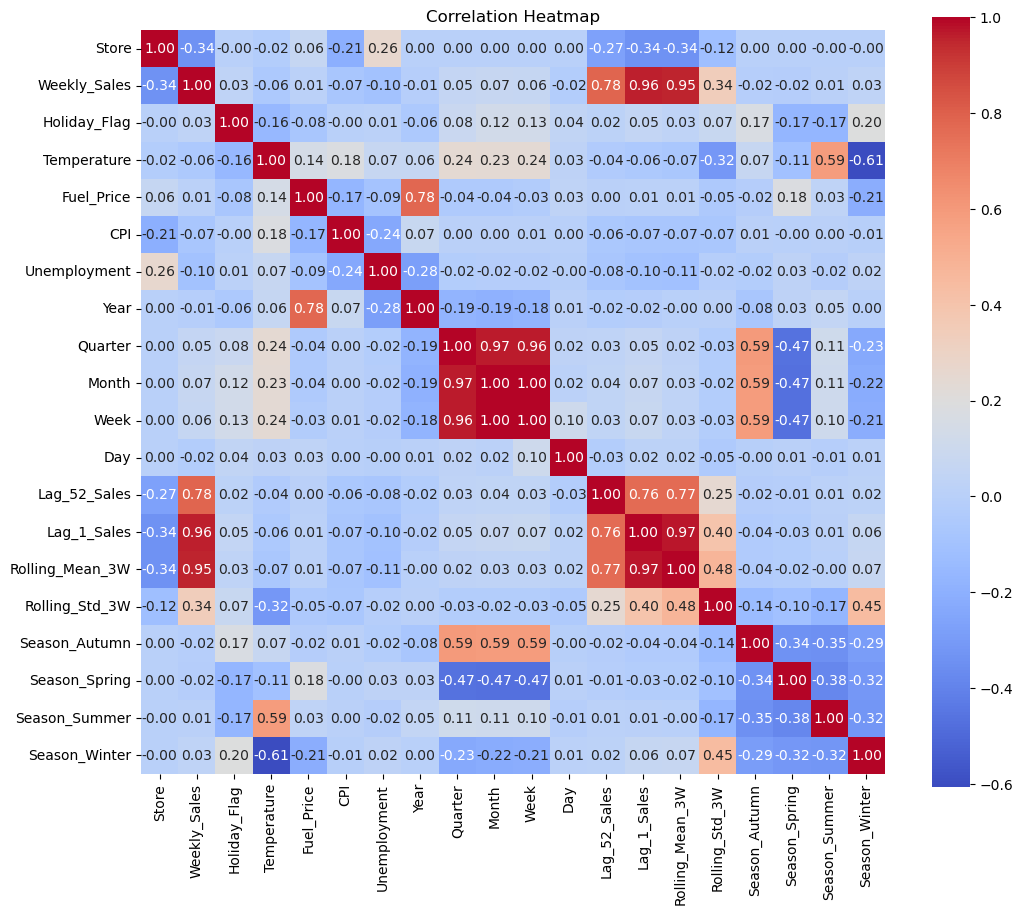

In [42]:
# Correlation Heatmap after encoding categorical variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
df.shape

(6435, 21)

## Save the Preprocessed Walmart Dataset to Prepare for Modelling

In [44]:
df.to_csv('walmart_preprocessed.csv', index=False)
print('walmart_preprocessed.csv has been saved.')

walmart_preprocessed.csv has been saved.
